In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

_Importing the datasets both training and test_

In [3]:
df_train = pd.read_csv('./Data/PartA/20ng_train.csv',compression = 'bz2')
df_test = pd.read_csv('./Data/PartA/20ng_test.csv',compression = 'bz2')
df_labels = pd.read_csv('./Data/PartA/20ng_labels.csv',compression = 'bz2')

In [48]:
df_labels

,0
0,comp.sys.ibm.pc.hardware
1,comp.sys.mac.hardware
2,rec.autos
3,rec.motorcycles
4,sci.crypt
5,sci.electronics
6,soc.religion.christian
7,talk.religion.misc


__Question 1.1__ : Focusing first on the training set, summarise the key features/observations
in the data: focus on the dimensionality, data ranges, feature and class distribution and
report anything out of the ordinary. What are the typical values of the features like?

_This is the dataframe for overall information about the training set data. The training set consists of 5648 different documents with total of 1001 unique words and has 8 different class labels._

In [49]:
df_train.shape

(5648, 1001)

In [ ]:
df_train_described = df_train.describe()
df_train_described

__Class 7, talk.religion.misc, has less data provided than all other classes.__

In [ ]:
df_train_class_counts = df_train["class"].value_counts()
df_train_class_counts

_The typical values (mean) of the features like for each class label is calculated below._

In [ ]:
list_of_tfidf_classes = [[0] * 1000]*8
for index, row in df_train.iterrows():
    list_of_tfidf_classes[int(row['class'])] = list_of_tfidf_classes[int(row['class'])] + row[:-1]
for x in range(0,8):
    list_of_tfidf_classes[x] = list_of_tfidf_classes[x]/df_train_class_counts[x]

In [ ]:
list_of_tfidf_classes

_The words mostly have the same tf-idf value; this can be understood by taking the standard deviation of the means of each unique word, which is low._

In [ ]:
df_train_described.iloc[1,:].std()

__Question 1.2__ : Looking now at the Testing set, how does it compare with the Training
Set (in terms of sizes and feature-distributions) and what could be the repurcussions of
this?

__There is a split of 75% training set to 25% test set__

In [63]:
df_test.describe()

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.002292,0.002168,0.007335,0.002817,0.002701,0.004449,0.003012,0.001716,0.001886,0.001745,...,0.003018,0.005356,0.003746,0.003812,0.007960,0.001970,0.006214,0.008706,0.009449,3.345194
std,0.032391,0.021397,0.034312,0.032169,0.021777,0.032393,0.026133,0.022855,0.019504,0.018376,...,0.026231,0.033441,0.028779,0.032836,0.039182,0.020613,0.037389,0.041551,0.043570,2.208286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,0.864159,0.469412,0.337561,0.620254,0.310053,0.504324,0.420903,0.632166,0.336667,0.387412,...,0.490894,0.481298,0.434553,0.543384,0.470697,0.566179,0.537827,0.532047,0.590114,7.000000


In [62]:
print('Number of rows and columns respectively of training set: ' 
      + str(df_train.shape[0]) + ', ' + str(df_train.shape[1]))

print('Training set class distribution:')
print(df_train["class"].value_counts())
print()

print('Number of rows and columns respectively of test set: ' 
      + str(df_test.shape[0]) + ', ' + str(df_test.shape[1]))

print('Test set class distribution:')
print(df_test["class"].value_counts())

Number of rows and columns respectively of training set: 5648, 1001
Training set class distribution:
6    748
3    747
4    743
2    742
5    738
0    737
1    722
7    471
Name: class, dtype: int64

Number of rows and columns respectively of test set: 1883, 1001
Test set class distribution:
6    249
3    249
4    248
2    248
5    246
0    245
1    241
7    157
Name: class, dtype: int64


__Question 1.3__ : Why do you think it is useful to consider TF-IDF weights as opposed to
just the frequency of times a word appears in a document as a feature?

_TF-IDF will create weights according how important a word is in a document. For example if the word is used very frequently, like stop words , the idf value will be close to 0. Thus TF-IDF somehow eliminates/clears not 'important' words from the feature vectors. For example, considering the stop words might be inrelevant and computations can be costly._

__Question 2.1 :__ The K-Means algorithm is non-deterministic. Explain why this is, and
how the final model is selected in the SKLearn implementation of KMeans.

_The initial selection of the cluster centers might affect the result in the end. Even though the data points are the same, the algorithm causes the non-determinisim. The test point might be classified differently acording to the initial cluster centers. We will not explicitly select the cluster centres in the SKLearn model; the model itself will select the initial cluster centers which speeds up the convergence of the algorithm._

__Question 2.2:__ One of the parameters we need to specify when using k-means is the number
of clusters. What is a reasonable number for this problem and why?

_By visualising the data, we will decide number of clusters we would like to use. The outliers in the data will be either removed or transformed. However it is impossible to come up with a graph for more than 3 dimensions. In this case we can use SSE(sum squared error) to decide which k value will be optimal. Example code can be seen below:_

In [65]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_train)
    Sum_of_squared_distances.append(km.inertia_)
Sum_of_squared_distances

[32840.52090499835,
 12011.220991420803,
 8263.254576986266,
 6608.1852836296985,
 6224.152404490892,
 5841.347863264131,
 5469.012993329456,
 5175.799878800897,
 5160.044981727505,
 5145.941835367454,
 5135.804262786552,
 5120.659758560258,
 5105.5044275561995,
 5099.181663921659]

__Question 2.3:__ We will use the Adjusted Mutual Information (AMI) i.e. adjusted_mutual
_info_score between the clusters and the true (known) labels to quantify the performance of the clustering. Give an expression for the MI in terms of entropy. In short,
describe what the MI measures about two variables, why this is applicable here and why
it might be difficult to use in practice.

Assume two label assignments (of the same N objects), U and V. Their entropy is the amount of uncertainty for a partition set, defined by:

\begin{align}
H(U) = - \sum_{i=1}^{|U|}P(i)\log(P(i))
\end{align}

where P(i) is the probability that an object picked at random from U falls into class Ui and same for P'(j).

\begin{align}
H(V) = - \sum_{j=1}^{|V|}P'(j)\log(P'(j))
\end{align}

The Mutual Information is given in terms of entrophy can be seen below:

\begin{align}
\text{MI}(U, V) = \sum_{i=1}^{|U|}\sum_{j=1}^{|V|}P(i, j)\log\left(\frac{P(i,j)}{P(i)P'(j)}\right)
\end{align}

where
\begin{align}
P(i, j) = |U_i \cap V_j| / N
\end{align}

is the probability that an object picked at random falls into both classes Ui and Vj.

Also there is another version without the probabilities:
\begin{align}
\text{MI}(U, V) = \sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i \cap V_j|}{N}\log\left(\frac{N|U_i \cap V_j|}{|U_i||V_j|}\right)
\end{align}

MI is a measure which tells us how much one variable tells us other variable (it is somehow related to the covariance). __"Covariance is only able to takes into account linear relationships but the MI can also handle non-linear relationships."__ "Mutual information calculates the statistical dependence between two variables and is the name given to information gain when applied to variable selection." (https://machinelearningmastery.com/information-gain-and-mutual-information/)

It might be hard because there will be many variables, we would have to do 
\begin{align}
\binom{N}{2}
\end{align}
many computations, where N is the number of attributes.

__Question 2.4:__ Fit K-Means objects with n_clusters ranging from 2 to 12. Set the
random seed to 1000 and the number of initialisations to 50, but leave all other values
at default. For each fit compute the adjusted mutual information (there is an SKLearn
function for that). Set average_method='max' . Plot the AMI scores against the number
of clusters (as a line plot).

In [34]:
AMI = []

df_train_without_classes = df_train.drop('class', axis = 1)
df_test_without_classes = df_test.drop('class', axis = 1)

for k in range(2,13):
    
    km = KMeans(n_clusters=k, random_state=1000, n_init = 50)
    km = km.fit(df_train_without_classes)
    y_pred = km.predict(df_test_without_classes)

    AMI.append(adjusted_mutual_info_score(df_test['class'], y_pred))

In [35]:
AMI

[0.09467890113466797,
 0.1950356379915207,
 0.24891808033912957,
 0.2288771399046942,
 0.2726797810438812,
 0.2911458052678768,
 0.32015410354365886,
 0.24870198923466513,
 0.31256372069963395,
 0.2943868732717312,
 0.29197266625025264]

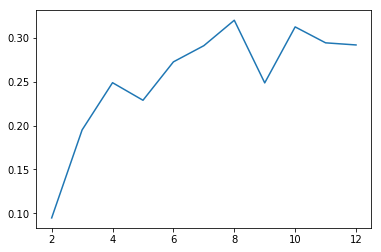

In [36]:
ax = sns.lineplot(x=range(2,13), y=AMI)
ax

https://math.stackexchange.com/questions/438078/mutual-information-for-clustering

__Question 2.5:__ Discuss any trends and interesting aspects which emerge from the plot.
Does this follow from your expectations?

__TODO: Enter the answer__

__Question 2.6:__ Let us investigate the case with four (4) clusters in some more detail.
Using seaborn's countplot function, plot a bar-chart of the number of data-points with a
particular class (encoded by colour) assigned to each cluster centre (encoded by position
on the plot's x-axis). As part of the cluster labels, include the total number of data-points
assigned to that cluster.

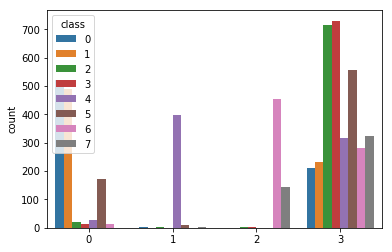

In [13]:
df_train_without_classes = df_train.drop('class', axis = 1)

km_histogram = KMeans(n_clusters=4, random_state=1000, n_init = 50)
km_histogram = km_histogram.fit(df_train_without_classes)


ax_new = sns.countplot(x=km_histogram.labels_, hue = "class", data=df_train)
ax_new

__Question 2.7:__ How does the clustering in Question2:(f) align with the true class labels?
Does it conform to your observations in Q 2(e)?

The class labels according to the same type of subjects, like computers, are clustered together.

__Question 3.1:__ What is the F1-score, and why is it preferable to accuracy in our problem?
How does the macro-average work to extend the score to multi-class classication?

_F1 score is a measurement which indicates whether the classified data is correct or not. It uses two measures which are recall and precission to find the F1 score. "Micro- and macro-averages (for whatever metric) will compute slightly different things, and thus their interpretation differs. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes)." (https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin)_

__Question 3.2:__ As always we start with a simple baseline classier. Dene such a classier
(indicating why you chose it) and report its performance on the Test set. Use the `macro'
average for the f1_score .

In [19]:
baseline_prediction = [2]*1883
f1_score(df_test['class'], baseline_prediction, average='macro')

/usr/lib64/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.02909432191459409

__Question 3.3:__ We will now train a LogisticRegression Classier from SKLearn. By
referring to the documentation, explain how the Logistic Regression model can be applied
to classify multi-class labels as in our case. Hint: Limit your explanation to methods we
discussed in the lectures.

TODO: EXPLAIN!

__Question 3.4:__ Train a Logistic Regressor on the training data. Set `solver=lbfgs`, 
`multi_class=multinomial` and random_state=0 . Use the Cross-Validation object you
created and report the average validation-set F1-score as well as the standard deviation.
Comment on the result.

In [21]:
lr = LogisticRegression(multi_class= 'multinomial', solver = 'lbfgs',
                       random_state = 0)

In [22]:
X_train_lr = df_train.drop('class', axis = 1).to_numpy()
y_train_lr = df_train['class'].to_numpy()

In [30]:
skf = StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(X_train_lr, y_train_lr):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_train_lr[train_index], X_train_lr[test_index]
    y_train, y_test = y_train_lr[train_index], y_train_lr[test_index]
    
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(f1_score(y_test, y_pred, average='macro'))
    print('Standard deviation: ' + str(y_pred.std()))   

0.6625495496128986
Standard deviation: 2.134835443282763
0.6804918899173111
Standard deviation: 2.0545216449687045
0.6815497804608959
Standard deviation: 2.118289090776395
0.6425966123149198
Standard deviation: 2.1549761016285855
0.685255241774714
Standard deviation: 2.0979088895436004
0.6942403363745525
Standard deviation: 2.140068205865807
0.6667317607628829
Standard deviation: 2.1692819829158676
0.6569984934920572
Standard deviation: 2.141263620051749
0.6582862150524074
Standard deviation: 2.1473693936241536
0.6510492803037036
Standard deviation: 2.116099532381271


__TODO : COMMENT ON THE RESULTS__

__Question 3.5:__ We will now optimise the Regularisation parameter C using cross-validation.
Train a logistic regressor for dierent values of C : in each case, evaluate the F1 score on
the training and validation portion of the fold. That is, for each value of C you must
provide the training set and validation-set scores per fold and then compute (and store)
the average of both over all folds. Finally plot the (average) training and validation-set
scores as a function of C . Hint: Use a logarithmic scale for C , spanning 19 samples
between 10^−4 to 10^5 .

In [25]:
log_list = np.logspace(start = -4, stop= 5, num = 19, base = 10)

In [52]:
list_of_f1score_average = []

for c in log_list:
    
    lr_with_C = LogisticRegression(multi_class= 'multinomial', 
                solver = 'lbfgs', random_state = 0, C = float(c))
    sum = 0
    
    for train_index, test_index in skf.split(X_train_lr, y_train_lr):
    
        X_train, X_test = X_train_lr[train_index], X_train_lr[test_index]
        y_train, y_test = y_train_lr[train_index], y_train_lr[test_index]
              
        lr_with_C.fit(X_train, y_train)
        y_pred = lr_with_C.predict(X_test)
        sum = sum + f1_score(y_test, y_pred, average='micro')
        
    list_of_f1score_average.append(sum/10)

In [53]:
list_of_f1score_average

[0.19319409126669226,
 0.3087628112860118,
 0.47978785498801846,
 0.6127227939752368,
 0.6492060466563897,
 0.6568161761397191,
 0.6669073387450754,
 0.6851531188184111,
 0.681095110717517,
 0.6754297160335946,
 0.6598512811909334,
 0.6426910549961333,
 0.6333065882805785,
 0.6361550906326925,
 0.63614912146366,
 0.6345398466531653,
 0.6334741026838027,
 0.6345517698146561,
 0.632952194716192]

In [57]:
log_list

array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05])

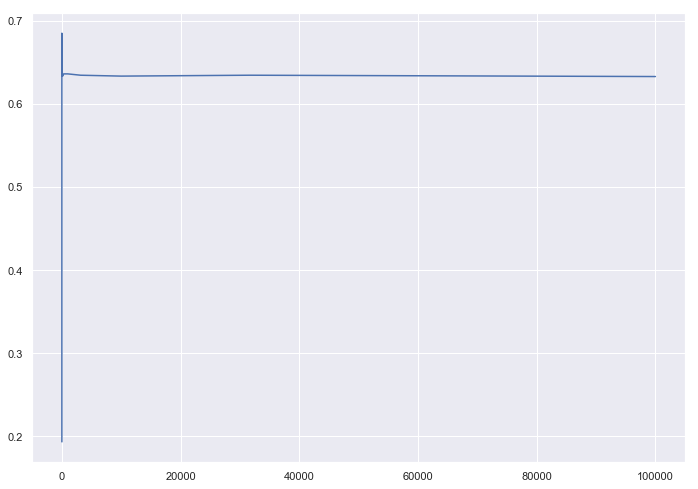

In [56]:
ax = sns.lineplot(x=log_list, y=list_of_f1score_average)
ax

__Question 3.6:__ What is the optimal value of C (and the corresponding score)? How did
you choose this value? By making reference to the eect of the regularisation parameter
C on the optimisation, explain what is happening in your plot from Question 3:(e) Hint:
Refer to the documentation for C in the LogisticRegression page on SKLearn .

_According to what I have calculated, as it can seen above, 3.16e-1 is the best hyper parameter C amongs other 18 choices._ __TODO:WRITE MORE__

__Question 3.7__ Finally, report the score of the best model on the test-set, after retraining
on the entire training set (that is drop the folds). Hint: You may need to set max_iter
= 200 . Comment briey on the result.

In [61]:
X_test_lr = df_test.drop('class', axis = 1)
y_test_lr = df_test['class']

In [60]:
lr_final = LogisticRegression(multi_class= 'multinomial', 
                solver = 'lbfgs', random_state = 0, 
                C = 3.16227766e-01, max_iter=200)

In [63]:
lr_final.fit(X_train_lr, y_train_lr)
y_predicted= lr_final.predict(X_test_lr)
print(f1_score(y_test_lr, y_predicted, average='macro'))

0.6649874691737969
